# Histogram Equilization

## Theory

Histogram Equilization is used in **image processing** to convert images in with low contrast into images with higher contrast. Its task is contrast enhancement. Any image can be represented as a matrix of pixels where each pixel holds a value for the colour it is. Take the example below:

<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <figure style="margin: 10px;">
        <img src="./Images/HE/input_image.png" alt="Initial Picture" style="width: 200px; height: 100px; object-fit: cover;">
        <figcaption>Initial Picture</figcaption>
    </figure>
     <figure style="margin: 10px;">
        <img src="./Images/HE/output_image.jpg" alt="Final Picture" style="width: 200px; height: 100px; object-fit: cover;">
        <figcaption>Final Picture</figcaption>
    </figure>
</div>

Histogram equilization works mainly on greyscale pictures - which is a 2D representation of images. Depending on the size of the image (n-bit), the greyscale is assigned. For example, a 3-bit image can store shades of grey that start from 0 (black) to 7 (white). Therefore, it can store 8 shades of grey. Similarly, an 8-bit greyscale image can store 256 shades (0: black, 255:white). Taken below is the example of a 3-bit greyscale image along with its 2D representation and its histogram equivalent.

<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <figure style="margin: 10px;">
        <img src="./Images/HE/hegs1.png" alt="3-bit Image" style="width: 200px; height: 200px; object-fit: cover;">
        <figcaption>3-bit Image</figcaption>
    </figure>
    <figure style="margin: 10px;">
        <img src="./Images/HE/hegs2.png" alt="2D Matrix Representation" style="width: 280px; height: 200px; object-fit: cover;">
        <figcaption>2D Matrix Representation</figcaption>
    </figure>
    <figure style="margin: 10px;">
        <img src="./Images/HE/hegs3.png" alt="Corresponding Histogram" style="width: 300px; height: 200px; object-fit: cover;">
        <figcaption>Corresponding Histogram</figcaption>
    </figure>
</div>

Objective is to get $s = T(r)$ transformation that produces a levels for every pixel level $r$ in the original image to get uniform histogram

Constraint on $T(r)$: 
$T(r)$ should satisfies the following conditions:
>$T(r)$ is monotonically increasing where $r$ is in the range $[0,1]$
>This condition ensures that output intensity values will never be less than corresponding input values, thus preventing artifactscreated by reversals of intensity
>$T(r)$ also varies in the range $[0,1]$
•
This condition ensures that resulting gray levels are in the same range as input levels

### Notations: 

  
In a gray level image, let us consider:    
>$L$  -No. of gray levels in the image $(0 to L-1)$  
>$r_k$-The normalized intensity value (gray level), $r_k∈[0,1]$, here $k ∈[0,L-1]$  
>$n_k$-No. of pixels with gray level rk  
>$N$-Total number of pixels in the image  

Histogram (h) of an image is defined as
$$h(r_k)=n_k  \hspace{30 mm}k=0,1,2,..L-1$$


The probabilities assigned to each gray level can be given by the relation:
$$𝒑_𝒓(𝒓_𝒌)=\frac{𝒏_𝒌}{𝑵}\hspace{10 mm}𝟎≤𝒓_𝒌≤𝟏\hspace{10 mm}𝒌=𝟎,𝟏,𝟐…𝑳−𝟏$$


The plot of $p_r(r_k)$ with respect to $r_k$ is called normalized histogram of the image

### Types of Images

There are 4 different types of images:
1. Dark image
2. Light Image
3. Low Contrast Image
4. High Contrast Image

Here we see the comparison between each image and its corresponding histogram

<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <figure style="margin: 10px;">
        <img src="./Images/HE/dark.jpg" alt="Dark Image" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>Dark Image</figcaption>
    </figure>
     <figure style="margin: 10px;">
        <img src="./Images/HE/darkhist.png" alt="Dark Image Histogram" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>Dark Image Histogram</figcaption>
    </figure>
</div>

<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <figure style="margin: 10px;">
        <img src="./Images/HE/light.jpg" alt="Light Image" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>Light Image</figcaption>
    </figure>
     <figure style="margin: 10px;">
        <img src="./Images/HE/lighthist.png" alt="Light Image Histogram" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>Light Image Histogram</figcaption>
    </figure>
</div>

<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <figure style="margin: 10px;">
        <img src="./Images/HE/lc.png" alt="Low Contrast Image" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>Low Contrast Image</figcaption>
    </figure>
     <figure style="margin: 10px;">
        <img src="./Images/HE/lchist.png" alt="Low Contrast Image Histogram" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>Low Contrast Image Histogram</figcaption>
    </figure>
</div>

<div style="display: flex; flex-wrap: wrap; justify-content: center;">
    <figure style="margin: 10px;">
        <img src="./Images/HE/hc.png" alt="High Contrast Image" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>High Contrast Image</figcaption>
    </figure>
     <figure style="margin: 10px;">
        <img src="./Images/HE/hchist.png" alt="High Contrast Image Histogram" style="width: 400px; height: 280px; object-fit: cover;">
        <figcaption>High Contrast Image Histogram</figcaption>
    </figure>
</div>

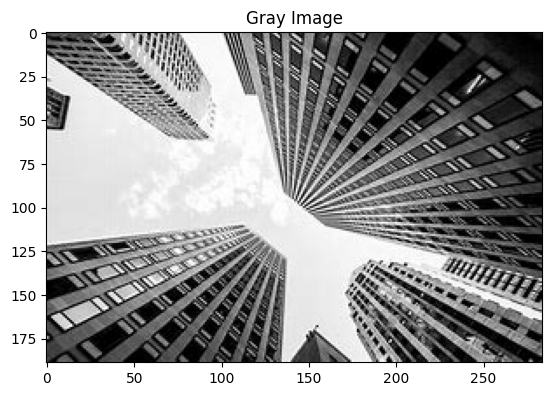

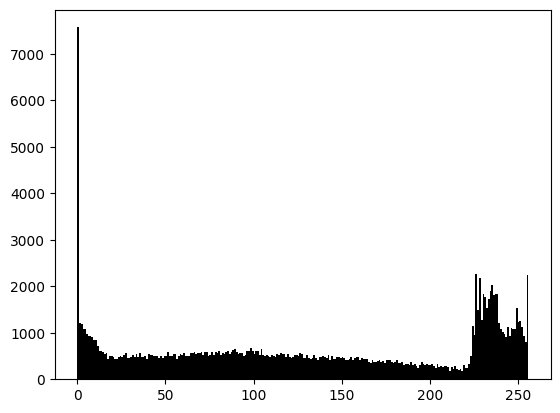

In [14]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('./Images/HE/hc.png')
plt.imshow(image, cmap='gray')
plt.title('Gray Image')
plt.show()
img_array = np.asarray(image)
#flatten image array and calculate histogram via binning
plt.hist(img_array.flatten(), bins=256, range=[0, 256], color='black')
histogram_array = np.bincount(img_array.flatten(), minlength=256)